In [155]:
#drivea eriştik
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dosya_yolu= '/content/drive/MyDrive/CSV/original_data.csv'

df=pd.read_csv(dosya_yolu)
#ana veri seti bozulmasın diye kopyaladık
df_intAll=df.copy()



**1)VERİ SETİMİZİ TANIYALIM**

In [157]:
df.head(5)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,Dalc,Walc,health,absences,G1,G2,G3,subject,Pass,Parents_edu
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,1,1,3,5,5,6,6,Maths,False,4
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,1,1,3,3,5,5,6,Maths,False,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,2,3,3,7,7,8,10,Maths,True,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,1,1,5,1,15,14,15,Maths,True,4
4,4,GP,F,16,U,GT3,T,3,3,other,...,1,2,5,3,6,10,10,Maths,True,3


In [158]:
df_intAll = df_intAll.drop(columns=['Unnamed: 0'])


In [159]:
df_intAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school       991 non-null    object
 1   sex          991 non-null    object
 2   age          991 non-null    int64 
 3   address      991 non-null    object
 4   famsize      991 non-null    object
 5   Pstatus      991 non-null    object
 6   Medu         991 non-null    int64 
 7   Fedu         991 non-null    int64 
 8   Mjob         991 non-null    object
 9   Fjob         991 non-null    object
 10  reason       991 non-null    object
 11  guardian     991 non-null    object
 12  traveltime   991 non-null    int64 
 13  studytime    991 non-null    int64 
 14  failures     991 non-null    int64 
 15  schoolsup    991 non-null    object
 16  famsup       991 non-null    object
 17  paid         991 non-null    object
 18  activities   991 non-null    object
 19  nursery      991 non-null    

In [160]:
df_intAll.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991.0,16.696266,1.233201,15.0,16.0,17.0,18.0,22.0
Medu,991.0,2.619576,1.126172,0.0,2.0,3.0,4.0,4.0
Fedu,991.0,2.402624,1.100208,0.0,2.0,2.0,3.0,4.0
traveltime,991.0,1.515641,0.729956,1.0,1.0,1.0,2.0,4.0
studytime,991.0,1.918264,0.713775,1.0,1.0,2.0,2.0,3.0
failures,991.0,0.231080,0.614704,0.0,0.0,0.0,0.0,3.0
famrel,991.0,3.940464,0.924136,1.0,4.0,4.0,5.0,5.0
freetime,991.0,2.158426,0.768132,1.0,2.0,2.0,3.0,3.0
goout,991.0,3.004036,0.929855,1.0,2.0,3.0,4.0,4.0
Dalc,991.0,1.494450,0.917682,1.0,1.0,1.0,2.0,5.0


Veri setimizi ileride algoritmalarda çalıştırabilmek adına hepsini Encoder kullanmadan numeric hale çeviriyoruz.Çünkü sunum yaparken hangi sayının neyi temsil ettiğini sizlere göstermek istedik.:

In [162]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Kategorik sütunları dönüştür
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                       'nursery', 'higher', 'internet', 'romantic', 'subject', 'Pass']

for column in categorical_columns:
    df_intAll[column] = label_encoder.fit_transform(df_intAll[column])
    # Her sütun için etiketleri ve ilişkili sınıfları yazdır
    print(f"{column}: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

school: {'GP': 0, 'MS': 1}
sex: {'F': 0, 'M': 1}
address: {'R': 0, 'U': 1}
famsize: {'GT3': 0, 'LE3': 1}
Pstatus: {'A': 0, 'T': 1}
Mjob: {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Fjob: {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
reason: {'course': 0, 'home': 1, 'other': 2, 'reputation': 3}
guardian: {'father': 0, 'mother': 1, 'other': 2}
schoolsup: {'no': 0, 'yes': 1}
famsup: {'no': 0, 'yes': 1}
paid: {'no': 0, 'yes': 1}
activities: {'no': 0, 'yes': 1}
nursery: {'no': 0, 'yes': 1}
higher: {'no': 0, 'yes': 1}
internet: {'no': 0, 'yes': 1}
romantic: {'no': 0, 'yes': 1}
subject: {'Maths': 0, 'Portuguese': 1}
Pass: {False: 0, True: 1}


In [163]:
weights = {'g1': 0.3, 'g2': 0.3, 'g3': 0.4}

# Ağırlıklı ortalama hesaplaması
weighted_avg = (df_intAll['G1'] * weights['g1'] +
                df_intAll['G2'] * weights['g2'] +
                df_intAll['G3'] * weights['g3'])

# Yeni sütunu DataFrame'e ekleyelim
df_intAll['AVG'] = weighted_avg

In [164]:
df_math = df_intAll[df_intAll['subject'] == 1]
df_por = df_intAll[df_intAll['subject'] == 0]

Oluşturacağımız algoritmamızda Bağlımlı değişkeni tek tutmak adına ağırlıklı ortalama kullanarak "AVG" yani sınavların ortalamasını hesapladık.

 **VERİ ÖN İŞLEME ADIMLARI 4 TANEDİR:**

* Veri Temizleme:Veri Setimizde verilerimiz eksiksiz ve doğru olduğu için bu adımda birşey yapmadık.

* Veri Birleştirme:İleride algoritmalarımızda kullanmak amacıyla üç adet sınavın ortalamasını alarak AVG adlı bir sütun oluşturarak bu değerleri oraya ekledik.

* Veri Dönüştürme:Veri setimizdeki çoğu değerlerimiz int türünde değildi ve bu da algoritma çalıştırmamızda sorun yaratıyordu.İnt olmayan değerlerimizi int türüne çevirdik.

* Veri İndirgeme:Şimdilik veri setimizi incelediğimizde gereksiz verilere rastlamadığımız için bu adımı geçtik.  



Ekstra olarak ileride kullanmak amacıyla iki tane dersimiz olan Matematik ve Portekizce derslerini iki ayrı veri setine kopyaladık.(df_math,df_por)




In [165]:
df_intAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       991 non-null    int64  
 1   sex          991 non-null    int64  
 2   age          991 non-null    int64  
 3   address      991 non-null    int64  
 4   famsize      991 non-null    int64  
 5   Pstatus      991 non-null    int64  
 6   Medu         991 non-null    int64  
 7   Fedu         991 non-null    int64  
 8   Mjob         991 non-null    int64  
 9   Fjob         991 non-null    int64  
 10  reason       991 non-null    int64  
 11  guardian     991 non-null    int64  
 12  traveltime   991 non-null    int64  
 13  studytime    991 non-null    int64  
 14  failures     991 non-null    int64  
 15  schoolsup    991 non-null    int64  
 16  famsup       991 non-null    int64  
 17  paid         991 non-null    int64  
 18  activities   991 non-null    int64  
 19  nursery 

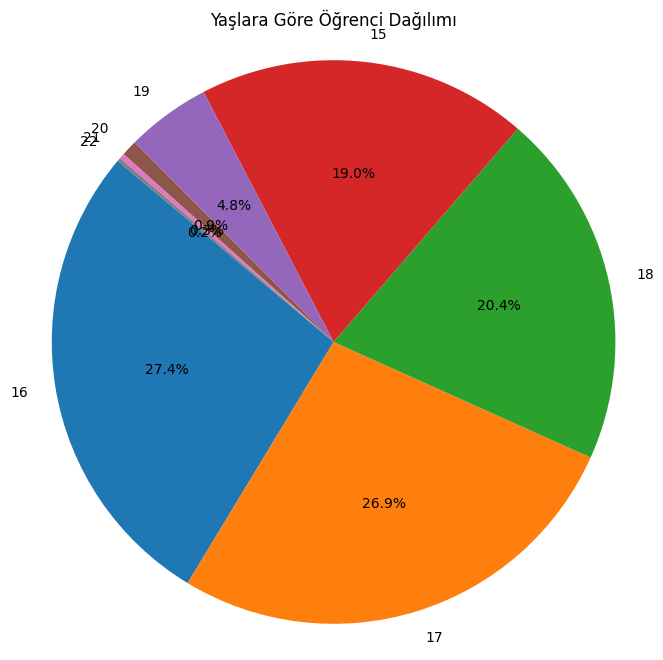

In [166]:
age_counts = df['age'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Yaşlara Göre Öğrenci Dağılımı')
plt.axis('equal')

plt.show()

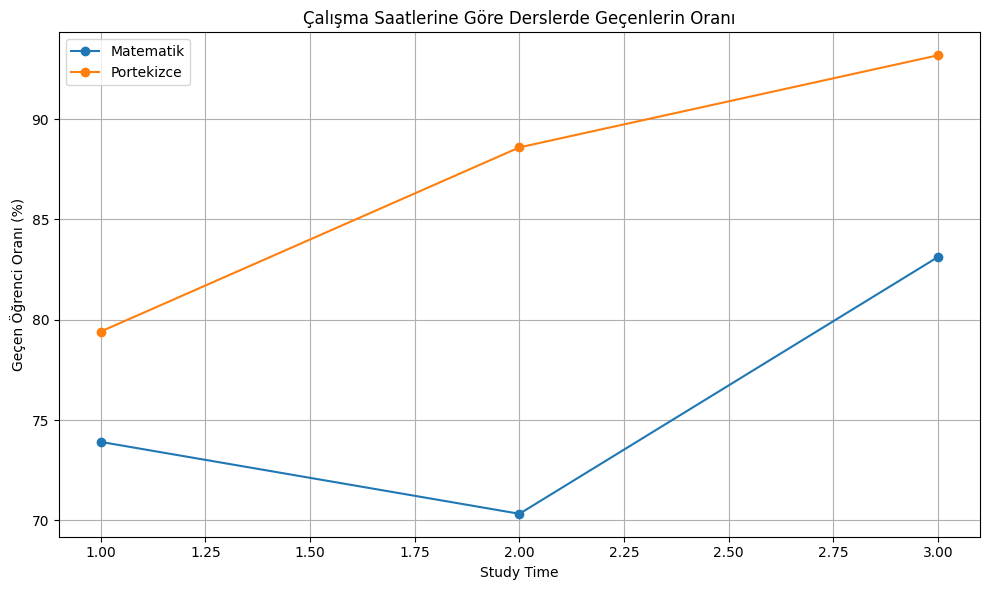

In [167]:

maths_pass_rates = []
for i in range(1, 4):
    maths_pass_count = df[(df['subject'] == 'Maths') & (df['Pass'] == True) & (df['studytime'] == i)].shape[0]
    total_maths_students = df[(df['subject'] == 'Maths') & (df['studytime'] == i)].shape[0]
    maths_pass_percentage = (maths_pass_count / total_maths_students) * 100 if total_maths_students != 0 else 0
    maths_pass_rates.append(maths_pass_percentage)

portuguese_pass_rates = []
for i in range(1, 4):
    portuguese_pass_count = df[(df['subject'] == 'Portuguese') & (df['Pass'] == True) & (df['studytime'] == i)].shape[0]
    total_portuguese_students = df[(df['subject'] == 'Portuguese') & (df['studytime'] == i)].shape[0]
    portuguese_pass_percentage = (portuguese_pass_count / total_portuguese_students) * 100 if total_portuguese_students != 0 else 0
    portuguese_pass_rates.append(portuguese_pass_percentage)


plt.figure(figsize=(10, 6))

plt.plot(range(1, 4), maths_pass_rates, marker='o', label='Matematik')
plt.plot(range(1, 4), portuguese_pass_rates, marker='o', label='Portekizce')

plt.xlabel('Study Time')
plt.ylabel('Geçen Öğrenci Oranı (%)')
plt.title('Çalışma Saatlerine Göre Derslerde Geçenlerin Oranı')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Yukarıdaki grafiğimizde Matematik ve Portekizce derslerinde 1,2,3 çalışan öğrencilerin yüzde kaçının dersten geçtiğini görüyoruz.






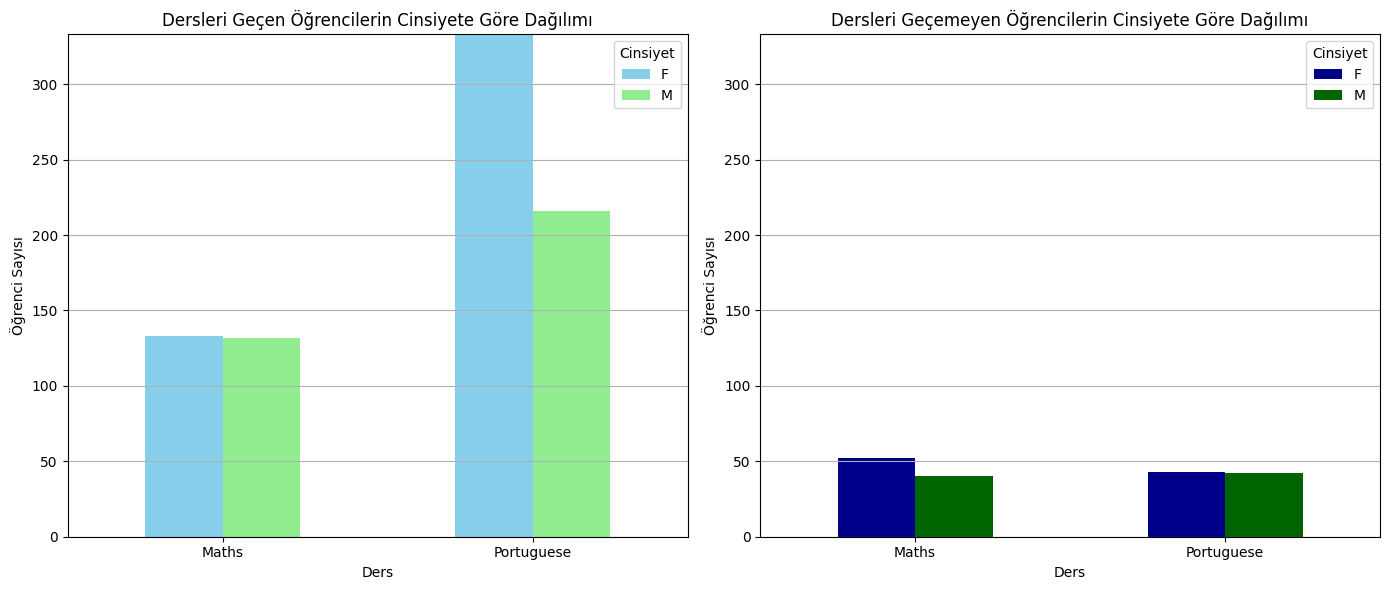

In [168]:
pass_counts = df[df['Pass'] == True].groupby(['subject', 'sex']).size().unstack(fill_value=0)

fail_counts = df[df['Pass'] == False].groupby(['subject', 'sex']).size().unstack(fill_value=0)

y_limit = max(pass_counts.max().max(), fail_counts.max().max())

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pass_counts.plot(kind='bar', color=['skyblue', 'lightgreen'], ax=plt.gca())
plt.xlabel('Ders')
plt.ylabel('Öğrenci Sayısı')
plt.title('Dersleri Geçen Öğrencilerin Cinsiyete Göre Dağılımı')
plt.legend(title='Cinsiyet', loc='upper right')
plt.xticks(rotation=0)
plt.ylim(0, y_limit)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
fail_counts.plot(kind='bar', color=['darkblue', 'darkgreen'], ax=plt.gca())
plt.xlabel('Ders')
plt.ylabel('Öğrenci Sayısı')
plt.title('Dersleri Geçemeyen Öğrencilerin Cinsiyete Göre Dağılımı')
plt.legend(title='Cinsiyet', loc='upper right')
plt.xticks(rotation=0)
plt.ylim(0, y_limit)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Yukarıdaki grafiklerimizde derslerden geçen ve geçemeyen öğrencilerin cinsiyet dağılımları ve sayıları belirtilmiştir.

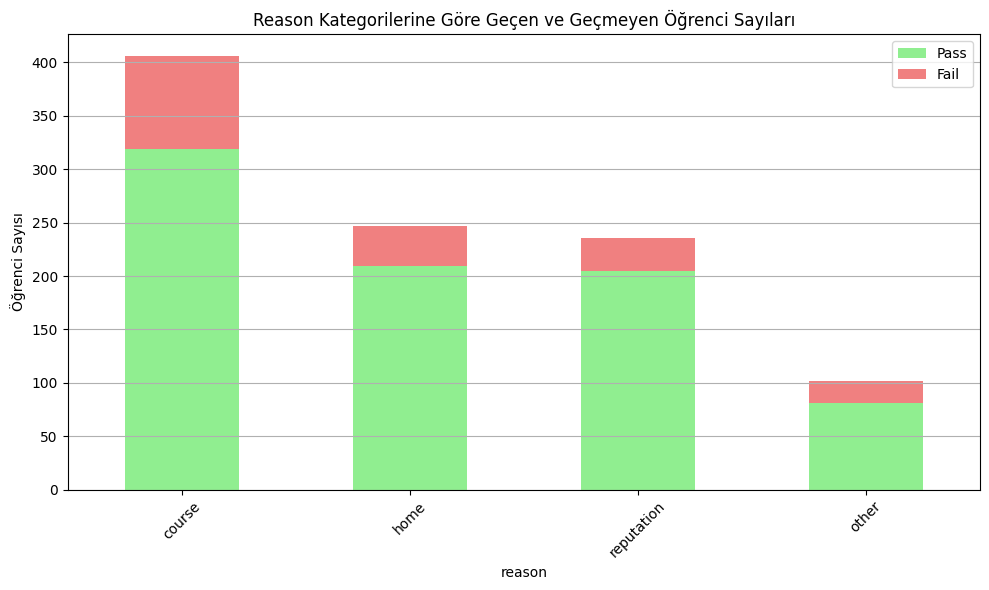

In [169]:
pass_counts = df[df['Pass'] == True]['reason'].value_counts()
fail_counts = df[df['Pass'] == False]['reason'].value_counts()

plt.figure(figsize=(10, 6))

pass_counts.plot(kind='bar', color='lightgreen', label='Pass')


fail_counts.plot(kind='bar', color='lightcoral', label='Fail', bottom=pass_counts)


plt.ylabel('Öğrenci Sayısı')
plt.title('Reason Kategorilerine Göre Geçen ve Geçmeyen Öğrenci Sayıları')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Yukarıdaki grafiğimizde "reason" yani okulu seçme sebeplerine göre derslerden geçen ve kalan öğrencilerin sayısını görüyoruz.

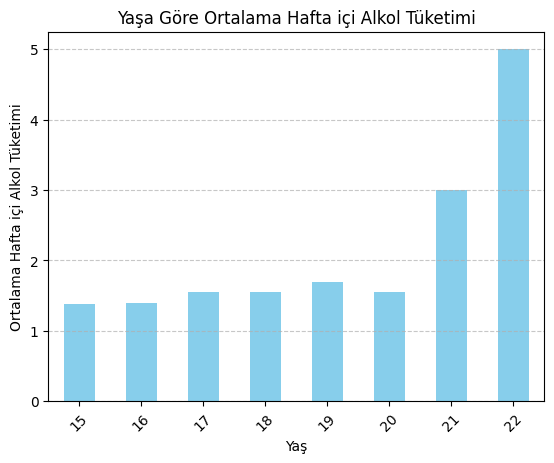

In [170]:

ortalama_dalc = df.groupby('age')['Dalc'].mean()


ortalama_dalc.plot(kind='bar', color='skyblue')
plt.xlabel('Yaş')
plt.ylabel('Ortalama Hafta içi Alkol Tüketimi')
plt.title('Yaşa Göre Ortalama Hafta içi Alkol Tüketimi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Yukarıdaki grafiğimizde Yaşlara göre hafta içi ortalama alkol tüketim sayılarını görüyoruz.

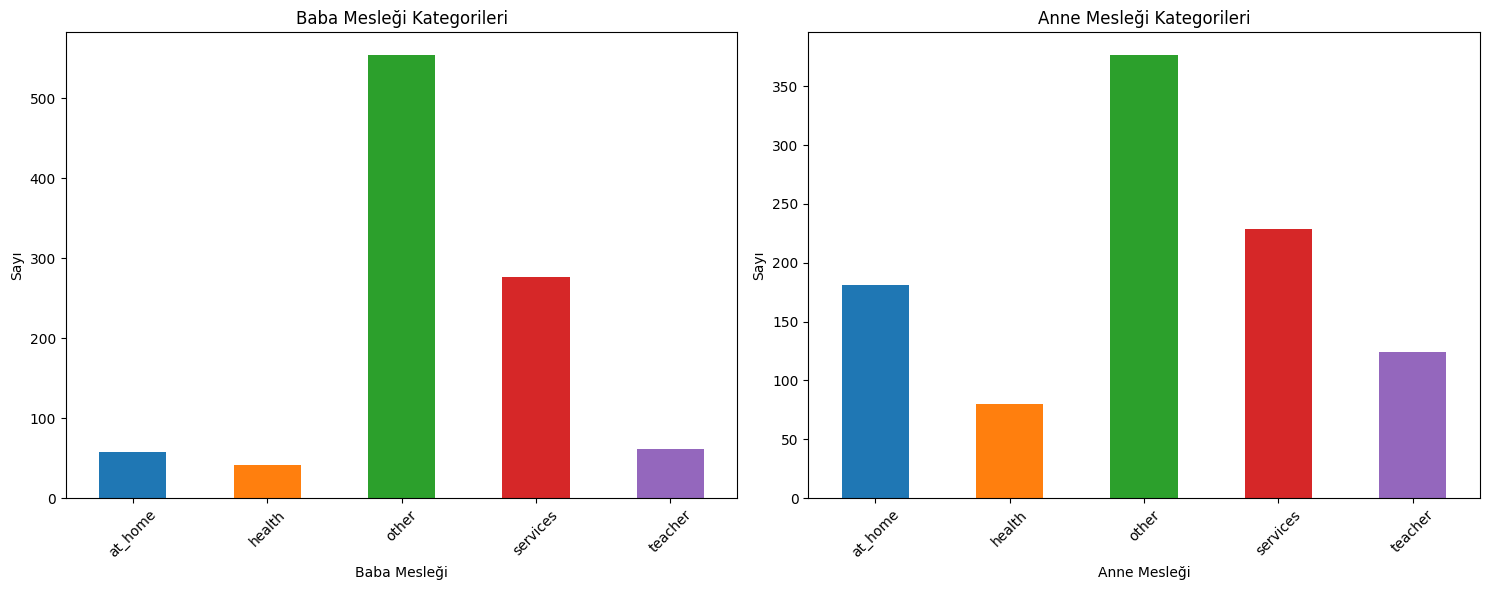

In [171]:
import matplotlib.pyplot as plt

grouped_fjob = df.groupby('Fjob').size()

grouped_mjob = df.groupby('Mjob').size()

colors = plt.cm.tab10.colors

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

grouped_fjob.plot(kind='bar', color=colors, ax=axes[0])
axes[0].set_title('Baba Mesleği Kategorileri')
axes[0].set_xlabel('Baba Mesleği')
axes[0].set_ylabel('Sayı')
axes[0].tick_params(axis='x', rotation=45)

grouped_mjob.plot(kind='bar', color=colors, ax=axes[1])
axes[1].set_title('Anne Mesleği Kategorileri')
axes[1].set_xlabel('Anne Mesleği')
axes[1].set_ylabel('Sayı')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



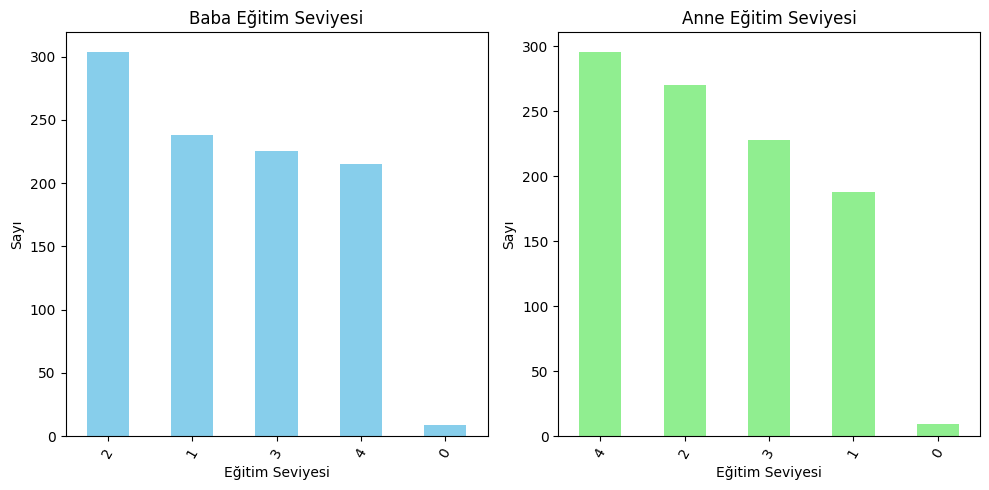

In [172]:
Fedu_stats = df['Fedu'].value_counts()

Medu_stats = df['Medu'].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
Fedu_stats.plot(kind='bar', color='skyblue')
plt.title('Baba Eğitim Seviyesi')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Sayı')
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
Medu_stats.plot(kind='bar', color='lightgreen')
plt.title('Anne Eğitim Seviyesi')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Sayı')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

YUKARIDA VERI GORSELLESTIRME ADIMLARIMIZI TAMAMLADIK

**2)ALGORİTMALARI TASARLAMAYA BAŞLIYORUZ**

Genel ve belirli featurelarda olmak üzere iki türlü makine öğrenimi algoritmalarımızı kullanmak istiyoruz.Belirli featurlarımızda aşşağıda belirttiğimiz üzere 3 çeşit olacaktır.(fam=aile içi etkilerin olduğu özellikler,soche=sosyal ve sağlık etkilerinin olduğu özellikler,
eco=ekonomik etkilerin olduğu özellikler) Ve bu featurlarımızı hem genel olarak hem de iki dersimiz için ayrı ayrı accuracy oranlarına bakacağız.Her featurelarımız için SVC,RandomForestClassifier ve Logistic Regresyon modellerini kullanacağız.

In [173]:
fam_features = ['famrel', 'Fjob', 'Mjob', 'famsize',"Medu","Fedu",'Pstatus','guardian']
soche_features = ['romantic', 'Dalc', 'Walc', 'health', 'absences', 'goout']
eco_features = ['internet', 'Fjob', 'Mjob', 'famsize',"Medu","Fedu",'traveltime','reason','paid','Parents_edu']



*2.1)Random Forest Algoritmasını kullanarak Dersten geçmeyi tahminliyoruz.*

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target=("Pass")

X = df_intAll[fam_features]
y = df_intAll[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Aile içi özelliklerin Pass'e etkisi:")
print("--------------------------------------")
print("Genel Accuracy:", accuracy)


X_math = df_math[fam_features]
y_math = df_math[target]

X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=42)

rf_classifier_math = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_math.fit(X_train_math, y_train_math)

y_pred_math = rf_classifier_math.predict(X_test_math)
accuracy_math = accuracy_score(y_test_math, y_pred_math)
print("Maths Accuracy:", accuracy_math)


X_portuguese = df_por[fam_features]
y_portuguese = df_por[target]

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_portuguese, y_portuguese, test_size=0.2,random_state=42)

rf_classifier_port = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_port.fit(X_train_port, y_train_port)

y_pred_port = rf_classifier_port.predict(X_test_port)
accuracy_port = accuracy_score(y_test_port, y_pred_port)
print("Portuguese Accuracy:", accuracy_port)


Random Forest Aile içi özelliklerin Pass'e etkisi:
--------------------------------------
Genel Accuracy: 0.7437185929648241
Maths Accuracy: 0.8188976377952756
Portuguese Accuracy: 0.6666666666666666


Yukarıda aile içi özelliklerin dersleri geçme üzerindeki tahminlemedeki başarı oranını görüyoruz.Ayrıca iki ayrı ders için ayrı ayrı bu algoritmamızdaki başarı oranlarına baktık.Matematik dersi için aile için etkinin algoritmamızda Portekizce dersine göre başarısı daha yüksek olduğunu gördük.

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target=("Pass")

X = df_intAll[eco_features]
y = df_intAll[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifiereco = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifiereco.fit(X_train, y_train)


y_pred = rf_classifiereco.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Ekonomik  özelliklerin Pass'e etkisi:")
print("--------------------------------------")
print("Genel Accuracy:", accuracy)

X_math = df_math[eco_features]
y_math = df_math[target]

X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=42)

rf_classifiereco_math = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifiereco_math.fit(X_train_math, y_train_math)

y_pred_math = rf_classifiereco_math.predict(X_test_math)
accuracy_math = accuracy_score(y_test_math, y_pred_math)
print("Maths Accuracy:", accuracy_math)


X_portuguese = df_por[eco_features]
y_portuguese = df_por[target]

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_portuguese, y_portuguese, test_size=0.2,random_state=42)

rf_classifiereco_port = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifiereco_port.fit(X_train_port, y_train_port)

y_pred_port = rf_classifiereco_port.predict(X_test_port)
accuracy_port = accuracy_score(y_test_port, y_pred_port)
print("Portuguese Accuracy:", accuracy_port)


Random Forest Ekonomik  özelliklerin Pass'e etkisi:
--------------------------------------
Genel Accuracy: 0.7185929648241206
Maths Accuracy: 0.8110236220472441
Portuguese Accuracy: 0.6944444444444444


In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target=("Pass")

X = df_intAll[soche_features]
y = df_intAll[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifiersoche = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifiersoche.fit(X_train, y_train)


y_pred = rf_classifiersoche.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Sağlık ve Sosyal özelliklerin Pass'e etkisi:")
print("--------------------------------------")
print("Genel Accuracy:", accuracy)
X_math = df_math[soche_features]
y_math = df_math[target]


rf_classifiersoche_math = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifiersoche_math.fit(X_train_math, y_train_math)

y_pred_math = rf_classifiersoche_math.predict(X_test_math)
accuracy_math = accuracy_score(y_test_math, y_pred_math)
print("Maths Accuracy:", accuracy_math)


X_portuguese = df_por[soche_features]
y_portuguese = df_por[target]

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_portuguese, y_portuguese, test_size=0.2,random_state=42)

rf_classifiersoche_port = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifiersoche_port.fit(X_train_port, y_train_port)

y_pred_port = rf_classifiersoche_port.predict(X_test_port)
accuracy_port = accuracy_score(y_test_port, y_pred_port)
print("Portuguese Accuracy:", accuracy_port)


Random Forest Sağlık ve Sosyal özelliklerin Pass'e etkisi:
--------------------------------------
Genel Accuracy: 0.7386934673366834
Maths Accuracy: 0.8110236220472441
Portuguese Accuracy: 0.7222222222222222


*2.2)Logistic R. Algoritmasını kullanarak Dersten geçmeyi tahminliyoruz.*

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target=("Pass")

X = df_intAll[soche_features]
y = df_intAll[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modellr = LogisticRegression(solver="liblinear")


modellr.fit(X_train, y_train)


y_pred = modellr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Lojistik Sağlık ve Sosyal özelliklerin Pass'e etkisi:")
print("--------------------------------------")
print("Genel Accuracy:", accuracy)


X_math = df_math[soche_features]
y_math = df_math[target]

X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=42)


lr_math =LogisticRegression(solver="liblinear")

lr_math.fit(X_train_math, y_train_math)

y_pred_math = lr_math.predict(X_test_math)
accuracy_math = accuracy_score(y_test_math, y_pred_math)
print("Maths Accuracy:", accuracy_math)


X_portuguese = df_por[soche_features]
y_portuguese = df_por[target]

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_portuguese, y_portuguese, test_size=0.2,random_state=42)

lr_port = LogisticRegression(solver="liblinear")

lr_port.fit(X_train_port, y_train_port)

y_pred_port = lr_port.predict(X_test_port)
accuracy_port = accuracy_score(y_test_port, y_pred_port)
print("Portuguese Accuracy:", accuracy_port)


Lojistik Sağlık ve Sosyal özelliklerin Pass'e etkisi:
--------------------------------------
Genel Accuracy: 0.7889447236180904
Maths Accuracy: 0.8346456692913385
Portuguese Accuracy: 0.75


In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target=("Pass")

X = df_intAll[eco_features]
y = df_intAll[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modellreco = LogisticRegression(solver="liblinear")


modellreco.fit(X_train, y_train)


y_pred = modellreco.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Lojistik Ekonomik özelliklerin Pass'e etkisi:")
print("--------------------------------------")
print("Genel Accuracy:", accuracy)

X_math = df_math[eco_features]
y_math = df_math[target]

X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=42)
lr_matheco =LogisticRegression(solver="liblinear")

lr_matheco.fit(X_train_math, y_train_math)

y_pred_math = lr_matheco.predict(X_test_math)
accuracy_math = accuracy_score(y_test_math, y_pred_math)
print("Maths Accuracy:", accuracy_math)


X_portuguese = df_por[eco_features]
y_portuguese = df_por[target]

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_portuguese, y_portuguese, test_size=0.2,random_state=42)

lr_poreco = LogisticRegression(solver="liblinear")

lr_poreco.fit(X_train_port, y_train_port)

y_pred_port = lr_poreco.predict(X_test_port)
accuracy_port = accuracy_score(y_test_port, y_pred_port)
print("Portuguese Accuracy:", accuracy_port)


Lojistik Ekonomik özelliklerin Pass'e etkisi:
--------------------------------------
Genel Accuracy: 0.7889447236180904
Maths Accuracy: 0.8267716535433071
Portuguese Accuracy: 0.7361111111111112


In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target=("Pass")

X = df_intAll[fam_features]
y = df_intAll[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lrfam = LogisticRegression(solver="liblinear")


lrfam.fit(X_train, y_train)


y_pred = lrfam.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Lojistik Aile özelliklerin Pass'e etkisi:")
print("--------------------------------------")
print("Genel Accuracy:", accuracy)

X_math = df_math[fam_features]
y_math = df_math[target]

X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=42)

lr_mathfam =LogisticRegression(solver="liblinear")

lr_mathfam.fit(X_train_math, y_train_math)

y_pred_math = lr_mathfam.predict(X_test_math)
accuracy_math = accuracy_score(y_test_math, y_pred_math)
print("Maths Accuracy:", accuracy_math)


X_portuguese = df_por[fam_features]
y_portuguese = df_por[target]

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_portuguese, y_portuguese, test_size=0.2,random_state=42)

lr_porfam = LogisticRegression(solver="liblinear")

lr_porfam.fit(X_train_port, y_train_port)

y_pred_port = lr_porfam.predict(X_test_port)
accuracy_port = accuracy_score(y_test_port, y_pred_port)
print("Portuguese Accuracy:", accuracy_port)


Lojistik Aile özelliklerin Pass'e etkisi:
--------------------------------------
Genel Accuracy: 0.7889447236180904
Maths Accuracy: 0.8267716535433071
Portuguese Accuracy: 0.7361111111111112


*2.3) SVC ile Classifier Algoritmasını kullanarak dersten geçmeyi tahminliyoruz.*

> Blok alıntı ekle



In [180]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


target=("Pass")

X = df_intAll[fam_features]
y = df_intAll[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svcfam = SVC(kernel='linear')


svcfam.fit(X_train, y_train)


y_pred = svcfam.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVC Aile özelliklerin Pass'e etkisi:")
print("--------------------------------------")
print("Genel Accuracy:", accuracy)

X_math = df_math[fam_features]
y_math = df_math[target]

X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=42)

svcfam_math =SVC(kernel='linear')

svcfam_math.fit(X_train_math, y_train_math)

y_pred_math = svcfam_math.predict(X_test_math)
accuracy_math = accuracy_score(y_test_math, y_pred_math)
print("Maths Accuracy:", accuracy_math)


X_portuguese = df_por[fam_features]
y_portuguese = df_por[target]

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_portuguese, y_portuguese, test_size=0.2,random_state=42)

svcfam_port = SVC(kernel='linear')

svcfam_port.fit(X_train_port, y_train_port)

y_pred_port = svcfam_port.predict(X_test_port)
accuracy_port = accuracy_score(y_test_port, y_pred_port)
print("Portuguese Accuracy:", accuracy_port)


SVC Aile özelliklerin Pass'e etkisi:
--------------------------------------
Genel Accuracy: 0.7889447236180904
Maths Accuracy: 0.8267716535433071
Portuguese Accuracy: 0.7361111111111112


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


target=("Pass")

X = df_intAll[eco_features]
y = df_intAll[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svceco = SVC(kernel='linear')


svceco.fit(X_train, y_train)


y_pred = svceco.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVC Ekonomik özelliklerin Pass'e etkisi:")
print("--------------------------------------")
print("Genel Accuracy:", accuracy)

X_math = df_math[eco_features]
y_math = df_math[target]

X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=42)

svceco_math =SVC(kernel='linear')

svceco_math.fit(X_train_math, y_train_math)

y_pred_math = svceco_math.predict(X_test_math)
accuracy_math = accuracy_score(y_test_math, y_pred_math)
print("Maths Accuracy:", accuracy_math)


X_portuguese = df_por[eco_features]
y_portuguese = df_por[target]

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_portuguese, y_portuguese, test_size=0.2,random_state=42)

svceco_por = SVC(kernel='linear')

svceco_por.fit(X_train_port, y_train_port)

y_pred_port = svceco_por.predict(X_test_port)
accuracy_port = accuracy_score(y_test_port, y_pred_port)
print("Portuguese Accuracy:", accuracy_port)


SVC Ekonomik özelliklerin Pass'e etkisi:
--------------------------------------
Genel Accuracy: 0.7889447236180904
Maths Accuracy: 0.8267716535433071
Portuguese Accuracy: 0.7361111111111112


In [182]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


target=("Pass")

X = df_intAll[soche_features]
y = df_intAll[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

svcsoche = SVC(kernel='linear')


svcsoche.fit(X_train, y_train)


y_pred = svcsoche.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVC Sağlık ve Sosyal özelliklerin Pass'e etkisi:")
print("--------------------------------------")
print("Genel Accuracy:", accuracy)

X_math = df_math[soche_features]
y_math = df_math[target]

X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=8)

svcsoche_math =SVC(kernel='linear')

svcsoche_math.fit(X_train_math, y_train_math)

y_pred_math = svcsoche_math.predict(X_test_math)
accuracy_math = accuracy_score(y_test_math, y_pred_math)
print("Maths Accuracy:", accuracy_math)


X_portuguese = df_por[soche_features]
y_portuguese = df_por[target]

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(X_portuguese, y_portuguese, test_size=0.2,random_state=8)

svcsoche_por = SVC(kernel='linear')

svcsoche_por.fit(X_train_port, y_train_port)

y_pred_port = svcsoche_por.predict(X_test_port)
accuracy_port = accuracy_score(y_test_port, y_pred_port)
print("Portuguese Accuracy:", accuracy_port)


SVC Sağlık ve Sosyal özelliklerin Pass'e etkisi:
--------------------------------------
Genel Accuracy: 0.8291457286432161
Maths Accuracy: 0.8503937007874016
Portuguese Accuracy: 0.7361111111111112


Yukarıda görüldüğü üzere sağlık ve sosyal  özelliklerin dersleri geçme üzerindeki tahminlemedeki başarı oranı Portekizce dersinde Matematik dersinden daha yüksektir.

Train seti R-kare skoru: 0.8666155775193445
Test seti R-kare skoru: 0.5968417406540811


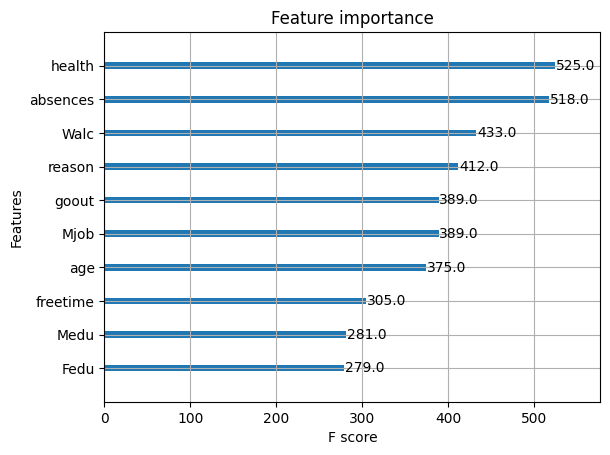

In [191]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import plot_importance


#sınav skorları olmadan ortalamsını tahmin etme şansı 50 herhangi bir sınavı ekledğimizde sonuç 90 e kadar yükseliyor
# Veri kümesi
X = df_intAll.drop(['G3', 'G1',"G2","AVG"], axis=1)
#X = df_intAll.drop("G3" axis=1)
y = df_intAll["AVG"]

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=8)

# XGBoost regresyon modeli oluşturma ve eğitme
model = xgb.XGBRegressor(
    objective='reg:squarederror', #amaç düşürülmek istenen hesaplama
    random_state=8,#hangi random stateten balıcak
    learning_rate=0.027,#öğrenme oranı 1 olursa overiftting ihtimali artar bir önceki aaçtan aynısı yapmaya çalışcağı için ve düzgün öğrenme olmaz
    max_depth=11,#max derinlik
    min_child_weight=8,#yaprakta oluşacak node sayısı
    subsample=0.9,#kullanılcak alt örnepin oranı
    colsample_bytree=0.57,#hangi özelleriklerin yüzdelik oalrak rastgele seçilip eğtimde kullanılması
    n_estimators=769,#oluşutrulcak ağaç sayısı
    early_stopping_rounds=2# early stoppingte 2 den fazla gelişme kaydetmmezse  model durur



)


#verbose eğitim sırasında çıktı vermeyi sağlar true ise
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)


# Tahminler yapalım
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Train ve test setlerinde R-kare skorunu hesaplayalım
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train seti R-kare skoru:", train_r2)
print("Test seti R-kare skoru:", test_r2)
plot_importance(model, max_num_features=10) # top 10 most important features
plt.show()



In [184]:
!pip install scikit-optimize
#skoptu kullanmak için yükledik en iyi hyperparametreyi bulmak için


In [185]:
import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X = df_intAll.drop(['G3', 'G1',"G2","AVG"], axis=1)
#X = df_intAll.drop("G3" axis=1)
y = df_intAll["AVG"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# BayesSearchCV ile en optimize hyperparametre değerlerini bulduk
param_space = {
    'learning_rate': (0.01, 0.5, 'log-uniform'),
    'max_depth': (1, 11),
    'min_child_weight': (1, 11),
    'subsample': (0.1, 0.9),
    'colsample_bytree': (0.1, 0.9),
    'n_estimators': (100, 1000),

}


model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, n_iter=50, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)#njob çalışan işlemci sayısı,cv cross validation test sayısı
bayes_search.fit(X, y)

print("En iyi parametreler:", bayes_search.best_params_)

# En iyi modeli kullanarak tahmin yapma altta çıkan değerleri yukardaki modelde değerleri parametleri öyle değiştirdik
best_model = bayes_search.best_estimator_
predictions = best_model.predict(X)

# Tahminlerin hata karesini hesaplama
mse = mean_squared_error(y, predictions)
print("Mean Squared Error:", mse)




Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score


X = df_intAll.drop(["G1",'G3',"G2","AVG"], axis=1)
#X = df_intAll.drop("G3" axis=1)
y = df_intAll["AVG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ElasticNet regresyon modelini oluştur
model = ElasticNet(alpha=0.01, l1_ratio=1, random_state=42)

# Modeli eğit
model.fit(X_train, y_train)

# Modelin performansını değerlendir
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print("ElasticNet G1 G2 G3 AVG sütunları olmadan Eğitim seti R2 skoru:", train_r2)
print("ElasticNet G1 G2 G3 AVG sütunları olmadan Test seti R2 skoru:", test_r2)


ElasticNet G1 G2 G3 AVG sütunları olmadan Eğitim seti R2 skoru: 0.5271682867997733
ElasticNet G1 G2 G3 AVG sütunları olmadan Test seti R2 skoru: 0.49348735854106074


In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score


X = df_intAll.drop(['G3',"G2","AVG"], axis=1)
#X = df_intAll.drop("G3" axis=1)
y = df_intAll["AVG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ElasticNet regresyon modelini oluştur
model = ElasticNet(alpha=0.01, l1_ratio=1, random_state=42)

# Modeli eğit
model.fit(X_train, y_train)

# Modelin performansını değerlendir
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print("ElasticNet G1 sınav sonucu eklenen ve tüm sütunları alınan Eğitim seti R2 skoru:", train_r2)
print("ElasticNet G1 sınav sonucu eklenen ve tüm sütunları alınan  Test seti R2 skoru:", test_r2)


ElasticNet G1 sınav sonucu eklenen ve tüm sütunları alınan Eğitim seti R2 skoru: 0.9146837512133875
ElasticNet G1 sınav sonucu eklenen ve tüm sütunları alınan  Test seti R2 skoru: 0.919193452339677


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
fam_features = ['famrel', 'Fjob', 'Mjob', 'famsize',"Medu","Fedu",'Pstatus','guardian',"G1"]
soche_features = ['romantic', 'Dalc', 'Walc', 'health', 'absences', 'goout',"G1"]
eco_features = ['internet', 'Fjob', 'Mjob', 'famsize',"Medu","Fedu",'traveltime','reason','paid','Parents_edu',"G1"]
#sadece fam ve g1 kullanıldı
X = df_intAll[fam_features]
y = df_intAll["AVG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Polinom özelliklerini oluştur
model = SVR(kernel='rbf')  # RBF (Gaussian) çekirdek kullanılıyor

# Modeli eğit
model.fit(X_train, y_train)

# Modelin performansını değerlendir (R2 skoru)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("SVR Aile Eğitim Seti R2 Skoru:", train_r2)
print("SVR Aile Test Seti R2 Skoru:", test_r2)


SVR Aile Eğitim Seti R2 Skoru: 0.9001911334324345
SVR Aile Test Seti R2 Skoru: 0.9060808950713861


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
fam_features = ['famrel', 'Fjob', 'Mjob', 'famsize',"Medu","Fedu",'Pstatus','guardian',"G1"]
soche_features = ['romantic', 'Dalc', 'Walc', 'health', 'absences', 'goout',"G1"]
eco_features = ['internet', 'Fjob', 'Mjob', 'famsize',"Medu","Fedu",'traveltime','reason','paid','Parents_edu',"G1"]
#sadece fam ve g1 kullanıldı
X = df_intAll[soche_features]
y = df_intAll["AVG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Polinom özelliklerini oluştur
model = SVR(kernel='rbf')  # RBF (Gaussian) çekirdek kullanılıyor

# Modeli eğit
model.fit(X_train, y_train)

# Modelin performansını değerlendir (R2 skoru)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("SVR Sosyal Ekonomik Eğitim Seti R2 Skoru:", train_r2)
print("SVR Sosyal Ekonomik Test Seti R2 Skoru:", test_r2)



SVR Sosyal Ekonomik Eğitim Seti R2 Skoru: 0.9007055515803292
SVR Sosyal Ekonomik Test Seti R2 Skoru: 0.9124444544667129


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
fam_features = ['famrel', 'Fjob', 'Mjob', 'famsize',"Medu","Fedu",'Pstatus','guardian',"G1"]
soche_features = ['romantic', 'Dalc', 'Walc', 'health', 'absences', 'goout',"G1"]
eco_features = ['internet', 'Fjob', 'Mjob', 'famsize',"Medu","Fedu",'traveltime','reason','paid','Parents_edu',"G1"]
#sadece fam ve g1 kullanıldı
X = df_intAll[eco_features]
y = df_intAll["AVG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Polinom özelliklerini oluştur
model = SVR(kernel='rbf')  # RBF (Gaussian) çekirdek kullanılıyor

# Modeli eğit
model.fit(X_train, y_train)

# Modelin performansını değerlendir (R2 skoru)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("SVR Ekonomik Eğitim Seti R2 Skoru:", train_r2)
print("SVR Ekonomik Test Seti R2 Skoru:", test_r2)



SVR Ekonomik Eğitim Seti R2 Skoru: 0.9009359537268083
SVR Ekonomik Test Seti R2 Skoru: 0.9023736643979969
